In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('hypothesis.csv')
print('Number of all annotations:', len(df), '\n')

Number of all annotations: 107 



In [4]:
print(df.head(15))

    level              created              updated  \
0       0  2023-07-27T12:07:05  2023-07-27T12:07:05   
1       0  2023-07-27T12:06:32  2023-07-27T12:06:32   
2       0  2023-07-27T12:05:21  2023-07-27T12:05:21   
3       0  2023-07-27T11:57:46  2023-07-27T11:57:46   
4       0  2023-07-27T11:55:45  2023-07-27T11:55:45   
5       0  2023-07-27T11:54:53  2023-07-27T11:54:53   
6       0  2023-07-27T11:54:33  2023-07-27T11:54:33   
7       0  2023-07-27T11:52:52  2023-07-27T11:52:52   
8       0  2023-07-27T11:48:40  2023-07-27T11:48:40   
9       1  2023-07-27T12:08:43  2023-07-27T12:08:43   
10      0  2023-07-27T11:48:07  2023-07-27T11:48:07   
11      0  2023-07-27T11:47:05  2023-07-27T11:47:05   
12      0  2023-07-27T11:45:14  2023-07-27T11:45:14   
13      0  2023-07-27T11:44:35  2023-07-27T11:44:35   
14      0  2023-07-25T21:43:24  2023-07-27T09:01:06   

                                                  url          user  \
0   https://networkcultures.org/reading-group/te

In [5]:
tag_counts = df['tags'].value_counts()
print(tag_counts)

important               23
key-word                14
citation                 8
<3                       7
trouble                  6
definition               4
reference                4
comment                  3
approval                 3
disapprobation           2
disapproval              2
approbation              2
solarpunk                1
commentary               1
keywords                 1
keyword                  1
approbation, trouble     1
background info          1
<3, reference            1
important, reference     1
Name: tags, dtype: int64


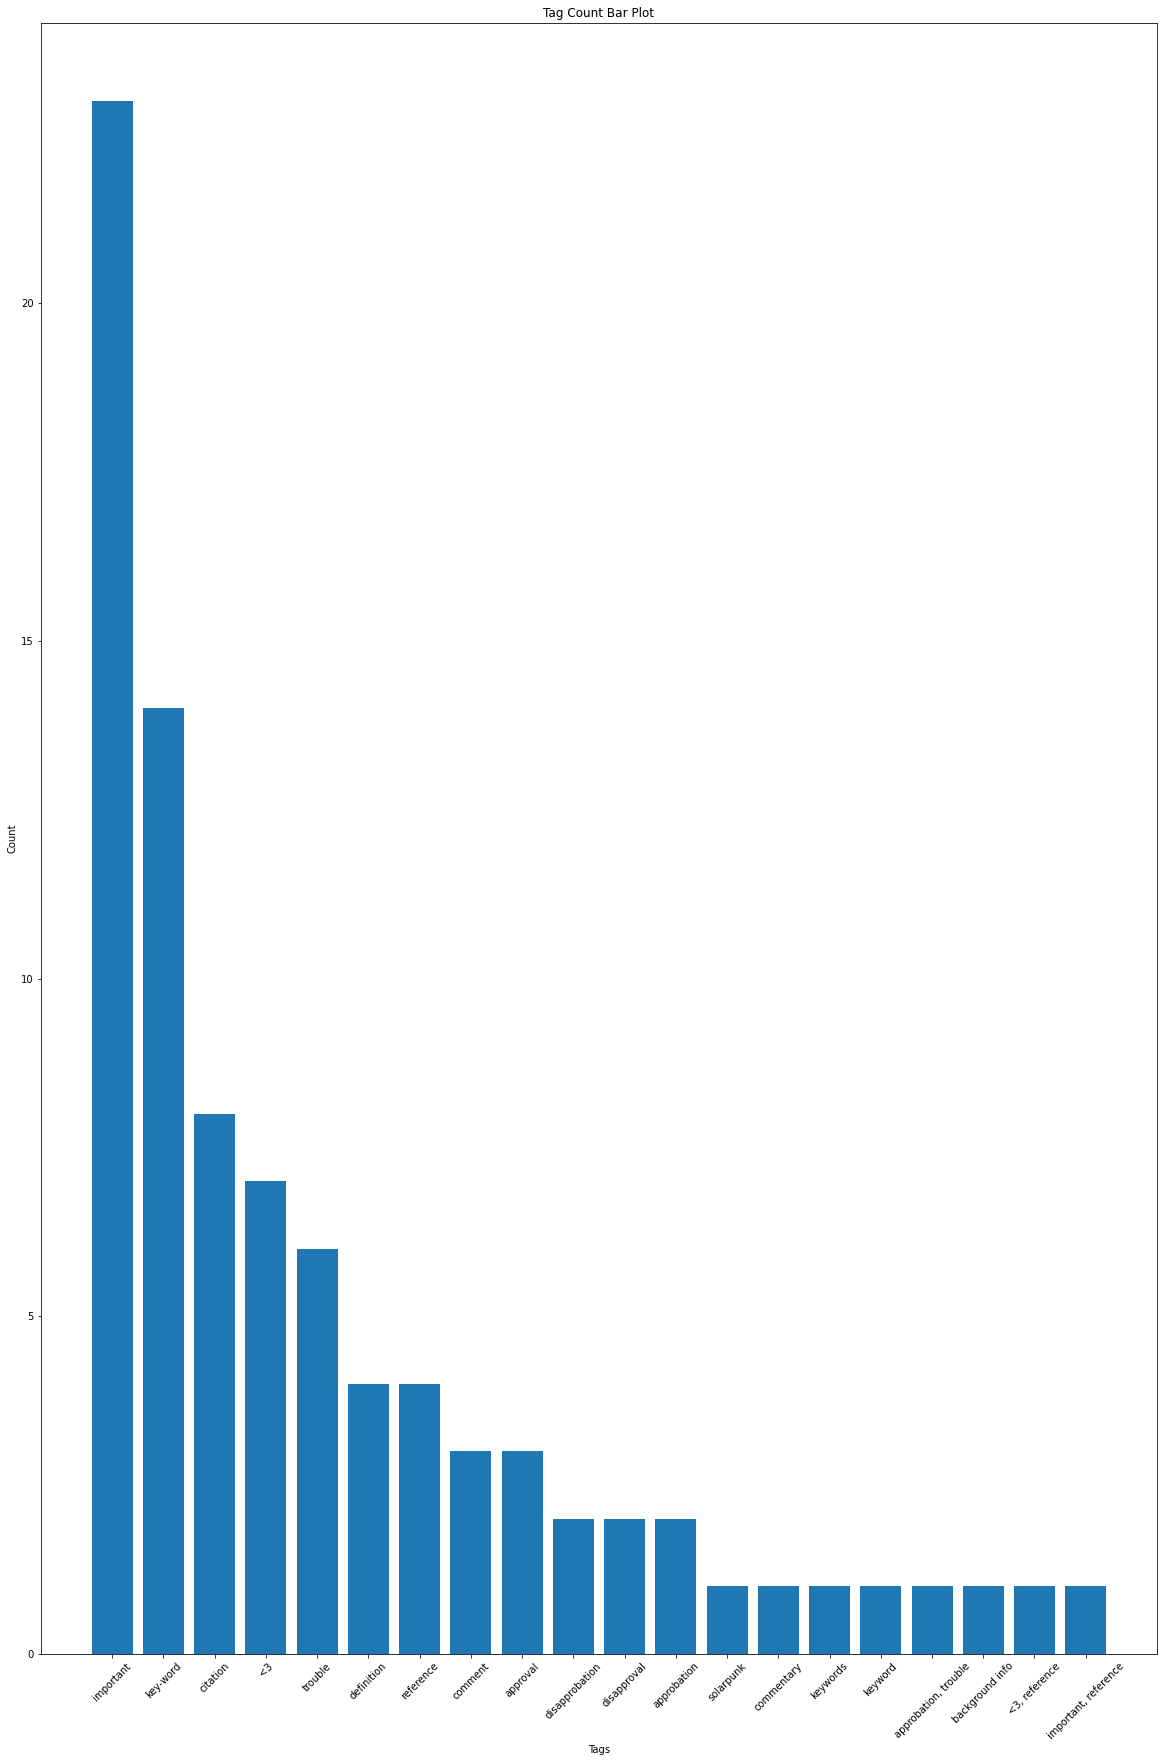

In [12]:
plt.figure(figsize=(20, 30))
plt.bar(tag_counts.index, tag_counts.values)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Tag Count Bar Plot')

plt.xticks(rotation=45)
plt.show()

In [13]:
# A mapping dictionary for grouping tags
tag_mapping = {
    'important': 'important',
    'important, reference': 'important',
    'key-word': 'key-word',
    'keyword': 'key-word',
    'definition': 'key-word',
    'keywords': 'key-word',
    'citation': 'citation',
    'reference': 'citation',
    '<3': 'affection',
    '<3, reference': 'affection',
    'comment': 'commentary',
    'commentary': 'commentary',
    'approval': 'approval',
    'approbation': 'approval',
    'approbation, trouble': 'approval',
    'disapproval': 'disapproval',
    'disapprobation': 'disapproval', 
    'trouble': 'trouble',
}

# A replace function for a new column with grouped values
df['grouped_tags'] = df['tags'].replace(tag_mapping)

print(df)

     level              created              updated  \
0        0  2023-07-27T12:07:05  2023-07-27T12:07:05   
1        0  2023-07-27T12:06:32  2023-07-27T12:06:32   
2        0  2023-07-27T12:05:21  2023-07-27T12:05:21   
3        0  2023-07-27T11:57:46  2023-07-27T11:57:46   
4        0  2023-07-27T11:55:45  2023-07-27T11:55:45   
..     ...                  ...                  ...   
102      1  2023-07-21T15:12:17  2023-07-21T15:12:17   
103      2  2023-07-25T21:47:04  2023-07-25T21:48:58   
104      0  2023-07-20T13:36:12  2023-07-20T13:36:12   
105      0  2023-07-20T13:32:12  2023-07-20T13:32:12   
106      1  2023-07-25T22:07:59  2023-07-25T22:07:59   

                                                   url            user  \
0    https://networkcultures.org/reading-group/text...    cyberfae1312   
1    https://networkcultures.org/reading-group/text...    cyberfae1312   
2    https://networkcultures.org/reading-group/text...    cyberfae1312   
3    https://networkcultures.or

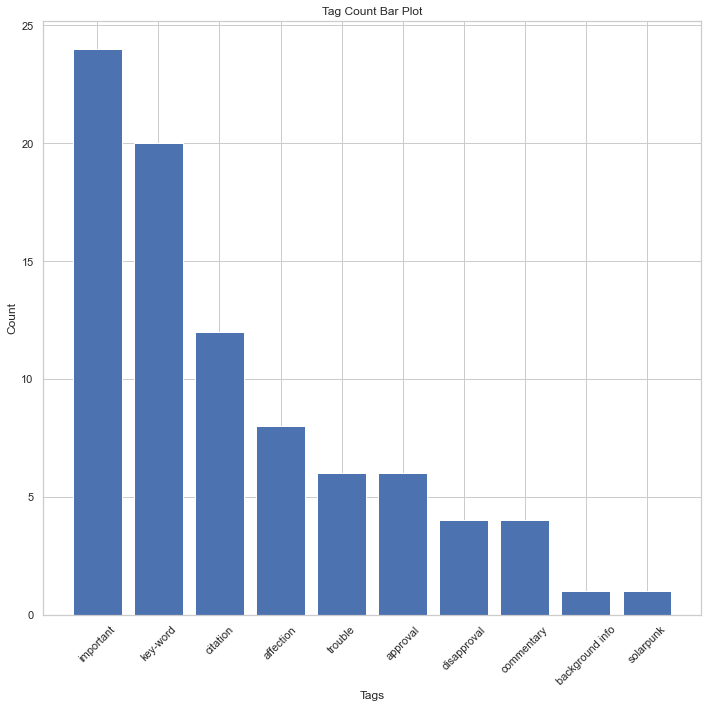

In [94]:
plt.figure(figsize=(10, 10))  
plt.bar(tag_counts.index, tag_counts.values)
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Tag Count Bar Plot')

plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('TagCountBarPlot.png', dpi=300)
plt.show()

In [16]:
df2 = pd.read_json('hypothesis.json')
print('Number of all annotations:', len(df2))

Number of all annotations: 107


In [17]:
merged_df = df.merge(df2, on='id', how='left')

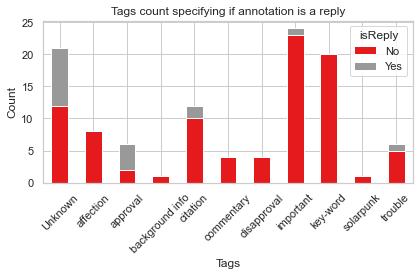

In [93]:
# new DataFrame with the count of annotations that are replies
# using the JSON file values of "true" or "false" to the key "isReply"
grouped_counts = merged_df.groupby(['grouped_tags', 'isReply']).size().unstack(fill_value=0)

grouped_counts.plot(kind='bar', stacked=True, colormap='Set1')
plt.xlabel('Tags')
plt.ylabel('Count')
plt.title('Tags count specifying if annotation is a reply')

plt.xticks(rotation=45)

plt.legend(title='isReply', labels=['No', 'Yes'])
plt.tight_layout()
plt.savefig('TagCountReplyBarPlot.png', dpi=300)
plt.show()

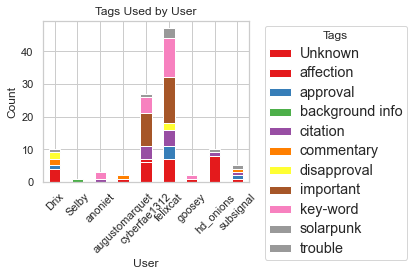

In [95]:
merged_df['grouped_tags'].fillna('Unknown', inplace=True)

sns.set(style="whitegrid")

# new pivot dataframe to have 'user' on the x-axis and 'tags' as columns
pivot_df = merged_df.pivot_table(index='user_x', columns='grouped_tags', values='isReply', aggfunc='count', fill_value=0)

ax = pivot_df.plot(kind='bar', stacked=True, colormap='Set1')
plt.xlabel('User')  
plt.ylabel('Count')
plt.title('Tags Used by User')

plt.xticks(rotation=45)

legend = ax.legend(title='Tags', bbox_to_anchor=(1.05, 1), loc='upper left')
for label in legend.get_texts():
    label.set_fontsize('large')

plt.tight_layout()
plt.savefig('TagsPer&ByUser.png', dpi=300)
plt.show()

In [43]:
pd.set_option('display.max_rows', None)
print(merged_df[['grouped_tags', 'user_x']])

        grouped_tags          user_x
0          important    cyberfae1312
1            trouble    cyberfae1312
2          important    cyberfae1312
3            Unknown    cyberfae1312
4            Unknown    cyberfae1312
5           key-word    cyberfae1312
6            Unknown    cyberfae1312
7          important    cyberfae1312
8          important    cyberfae1312
9            Unknown       hd_onions
10         important    cyberfae1312
11           Unknown    cyberfae1312
12         important    cyberfae1312
13          key-word    cyberfae1312
14          key-word        felixcat
15         important        felixcat
16         affection        felixcat
17           trouble        felixcat
18          key-word        felixcat
19          key-word        felixcat
20         affection        felixcat
21          key-word        felixcat
22         important        felixcat
23       disapproval            Drix
24           Unknown            Drix
25        commentary            Drix
2

In [68]:
print(merged_df['created_x'])

0      2023-07-27T12:07:05
1      2023-07-27T12:06:32
2      2023-07-27T12:05:21
3      2023-07-27T11:57:46
4      2023-07-27T11:55:45
5      2023-07-27T11:54:53
6      2023-07-27T11:54:33
7      2023-07-27T11:52:52
8      2023-07-27T11:48:40
9      2023-07-27T12:08:43
10     2023-07-27T11:48:07
11     2023-07-27T11:47:05
12     2023-07-27T11:45:14
13     2023-07-27T11:44:35
14     2023-07-25T21:43:24
15     2023-07-25T21:43:00
16     2023-07-25T21:51:46
17     2023-07-25T21:32:18
18     2023-07-25T21:17:04
19     2023-07-25T21:15:48
20     2023-07-25T21:07:21
21     2023-07-25T21:04:04
22     2023-07-25T21:03:28
23     2023-07-26T22:44:27
24     2023-07-26T22:43:22
25     2023-07-26T22:39:39
26     2023-07-26T22:33:19
27     2023-07-26T22:30:23
28     2023-07-26T22:28:37
29     2023-07-20T17:42:28
30     2023-07-25T21:17:09
31     2023-07-19T16:39:54
32     2023-07-19T16:26:01
33     2023-07-19T16:23:11
34     2023-07-19T16:19:42
35     2023-07-19T16:17:34
36     2023-07-19T16:07:03
3

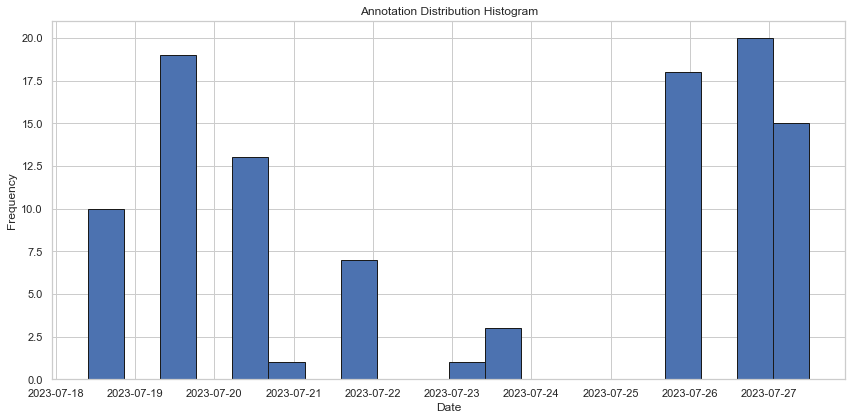

In [96]:
# A histogram to visualize the distribution of annotations throughout the 10 days span of reading
plt.figure(figsize=(12, 6))  
plt.hist(merged_df['updated_y'], bins=20, edgecolor='k')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Annotation Distribution Histogram')
plt.grid(True)

plt.tight_layout()
plt.savefig('AnnotationDistributionHistogram.png', dpi=300)
plt.show()

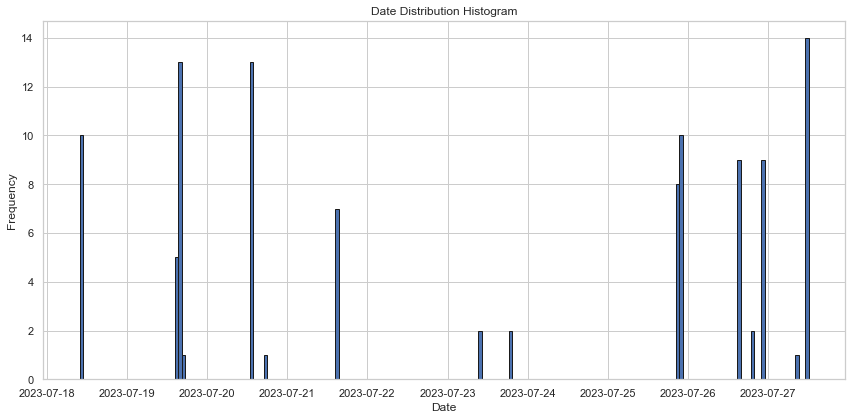

In [97]:
# A Histogram with two columns per day
plt.figure(figsize=(12, 6))  
plt.hist(merged_df['updated_y'], bins=2 * num_unique_dates, edgecolor='k')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Date Distribution Histogram')
plt.grid(True)

plt.tight_layout()
plt.savefig('AnnotationDistributionHistogram2.png', dpi=300)
plt.show()